<h2><b>Optimización de Portafolios de Markowitz</b></h2>
<h4>Juan David Rincón</h4>

In [53]:
# Librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy

In [58]:
# Parámetros iniciales.
stocks = ["HPQ", "INTC", "JNJ", "JPM", "KO", "PFE", "PG", "PYPL", "TSLA", "XOM"]
start_date = "2016-01-01"
end_date = "2022-12-31"
risk_free_ticker = "^IRX" # 13 weeks (3 months) Treasury Bills.
num_assets = len(stocks)
numberSim = 25000

In [59]:
# Extraer datos activos.
prices_df = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
print(prices_df)

[*********************100%***********************]  10 of 10 completed
                  HPQ       INTC         JNJ         JPM         KO   
Date                                                                  
2016-01-04   8.995456  27.222549   80.990753   50.781284  32.851891  \
2016-01-05   9.080758  27.094410   81.329292   50.869080  32.968105   
2016-01-06   8.755056  26.493731   80.918198   50.134747  32.789906   
2016-01-07   8.351814  25.500614   79.975166   48.107334  32.247536   
2016-01-08   8.204474  25.236324   79.120735   47.029758  32.162308   
...               ...        ...         ...         ...        ...   
2022-12-23  25.813980  25.494946  172.252945  126.698761  61.868103   
2022-12-27  26.113022  25.348366  172.204422  127.142715  62.246178   
2022-12-28  25.601759  24.957489  171.457123  127.837570  61.625751   
2022-12-29  26.084084  25.612207  172.330612  128.571060  61.994129   
2022-12-30  25.920092  25.827188  171.447388  129.420349  61.664528   

     

In [60]:
# Extraer tasa libre de riesgo.
risk_free = yf.Ticker(risk_free_ticker).history(start=start_date, end=end_date)
risk_free = risk_free['Close'].iloc[-1]
risk_free /= 100
print(risk_free)

0.042600002288818356


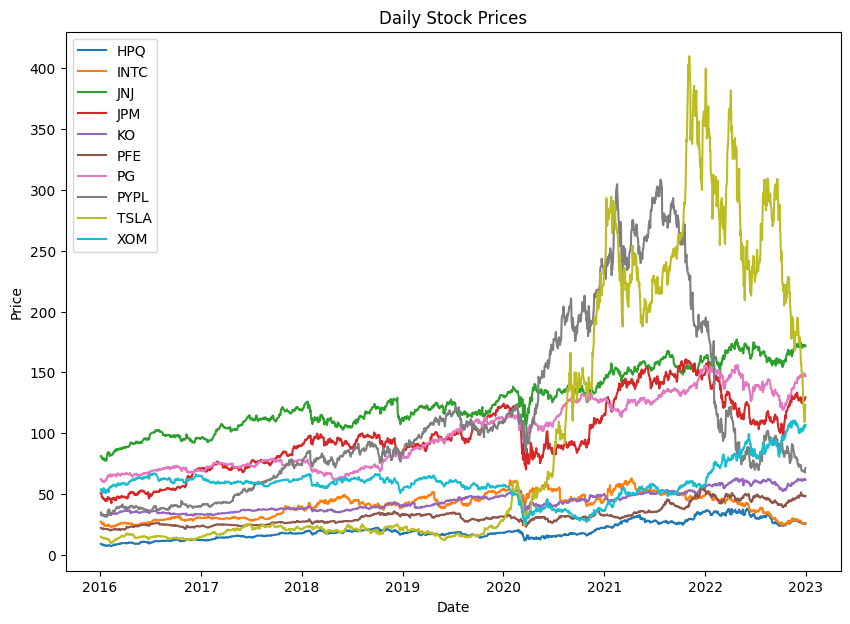

In [61]:
# Gráfica precios.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(prices_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

In [62]:
# Retornos Diarios.
returns_df = prices_df.pct_change().dropna()
print(returns_df.head())

# Retornos promedio.
mean_returns = np.array(returns_df.mean())
print(mean_returns)

# Nuevo array de stocks.
stocks = returns_df.columns

                 HPQ      INTC       JNJ       JPM        KO       PFE   
Date                                                                     
2016-01-05  0.009483 -0.004707  0.004180  0.001729  0.003538  0.007199  \
2016-01-06 -0.035867 -0.022170 -0.005055 -0.014436 -0.005405 -0.017713   
2016-01-07 -0.046058 -0.037485 -0.011654 -0.040439 -0.016541 -0.006643   
2016-01-08 -0.017642 -0.010364 -0.010684 -0.022399 -0.002643 -0.012739   
2016-01-11  0.006616  0.017455 -0.006010 -0.001528  0.001686  0.002258   

                  PG      PYPL      TSLA       XOM  
Date                                                
2016-01-05  0.003190 -0.012662  0.000090  0.008521  
2016-01-06 -0.009666 -0.009618 -0.019648 -0.008321  
2016-01-07 -0.008734 -0.025015 -0.015477 -0.016007  
2016-01-08 -0.015678 -0.013281 -0.021563 -0.020202  
2016-01-11  0.009214  0.010707 -0.014929 -0.013389  
[0.00085521 0.00019825 0.00049654 0.00070113 0.00043214 0.00055502
 0.00056436 0.00071132 0.00188441 0.0005671

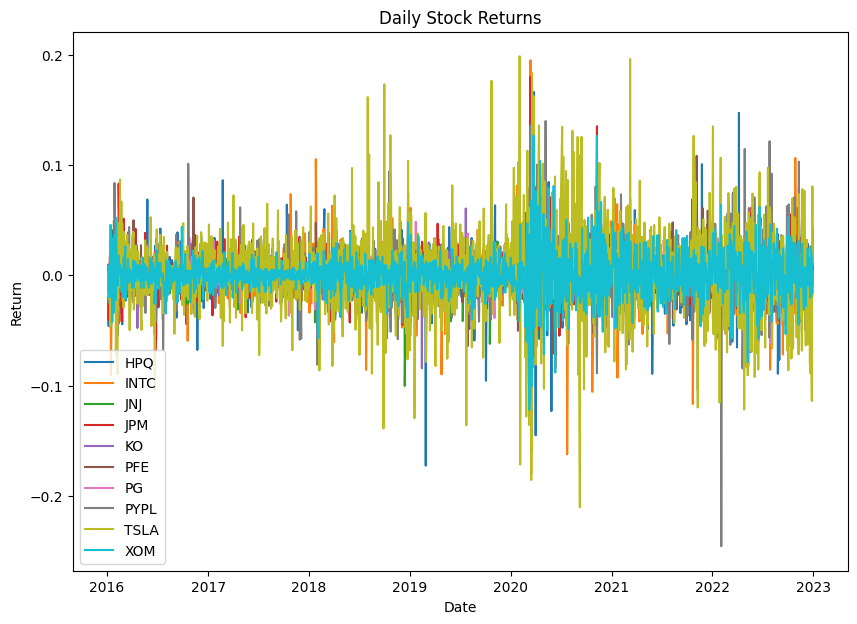

In [63]:
# Gráfica retornos.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(returns_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return')

plt.legend(loc="lower left")
plt.show()

In [64]:
# Inversión individual en los activos.
stocks_return = (1+mean_returns)**(252)-1
stocks_risk = np.std(returns_df)*np.sqrt(252)

indv_all = pd.DataFrame({"Annualized Return" : np.round(stocks_return*100, 2),
                         "Annualized Risk" : np.round(stocks_risk*100, 2)})

print("-"*80)
print("Individual Allocation")
print("\n")
print(indv_all.T)
print("-"*80)

--------------------------------------------------------------------------------
Individual Allocation


                     HPQ   INTC    JNJ    JPM     KO    PFE     PG   PYPL   
Annualized Return  24.04   5.12  13.33  19.32  11.50  15.01  15.28  19.62  \
Annualized Risk    35.62  33.79  18.84  29.29  19.31  23.64  19.66  38.97   

                    TSLA    XOM  
Annualized Return  60.71  15.36  
Annualized Risk    58.77  29.80  
--------------------------------------------------------------------------------


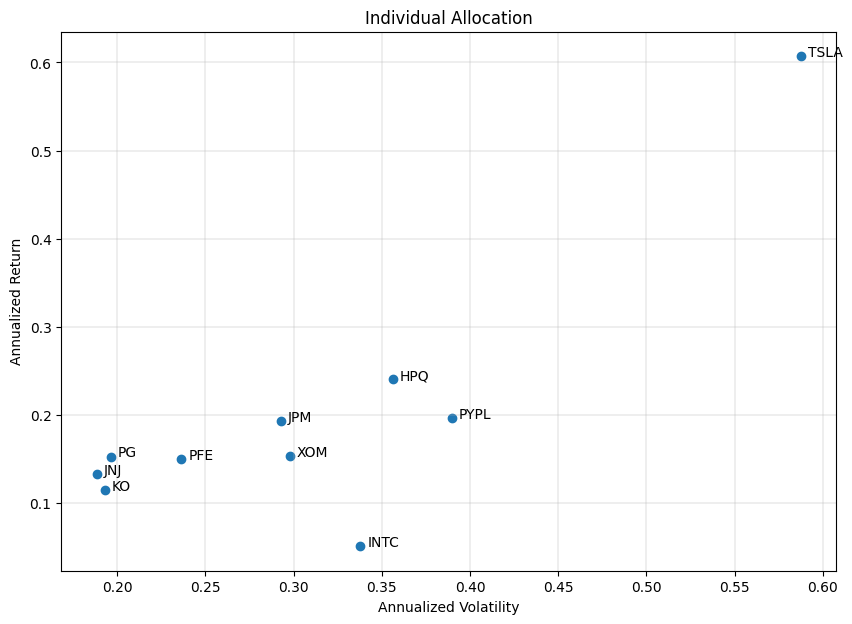

In [65]:
# Gráfica activos individuales.
plt.figure(figsize=(10,7))
plt.scatter(stocks_risk, stocks_return)

for i, name in enumerate(stocks):
    plt.annotate(name, (stocks_risk[i], stocks_return[i]), xytext=(5,0), textcoords='offset points')

plt.title('Individual Allocation')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.show()

In [67]:
# Simular portafolios.
weights = pd.DataFrame(np.nan, index=range(numberSim), columns=stocks)

for i in range(numberSim):
  random_numbers = np.array([random.random() for _ in range(returns_df.shape[1])])
  sum_rand_numbers = sum(random_numbers)

  weights.iloc[i,:] = random_numbers/sum_rand_numbers

print(weights)

            HPQ      INTC       JNJ       JPM        KO       PFE        PG   
0      0.171520  0.110671  0.056826  0.175475  0.116488  0.013887  0.030913  \
1      0.054720  0.168751  0.006067  0.207038  0.098243  0.008186  0.039292   
2      0.145502  0.010646  0.154317  0.139411  0.071994  0.156479  0.021546   
3      0.074894  0.113973  0.009587  0.111706  0.047968  0.109395  0.101627   
4      0.087077  0.081726  0.005977  0.068453  0.158141  0.043477  0.159495   
...         ...       ...       ...       ...       ...       ...       ...   
24995  0.193234  0.090406  0.104104  0.119399  0.055290  0.053711  0.063089   
24996  0.166142  0.126080  0.108039  0.174367  0.042782  0.113380  0.055037   
24997  0.048037  0.005972  0.112146  0.118299  0.087305  0.099678  0.138106   
24998  0.063170  0.132184  0.147391  0.111923  0.042033  0.097238  0.041451   
24999  0.061388  0.150780  0.092693  0.127753  0.053082  0.144971  0.059426   

           PYPL      TSLA       XOM  
0      0.0126

In [68]:
# Matriz de Varianza Covarianza.
cov_matrix = np.cov(returns_df, rowvar=False)

# Desviaciones estándar por activo.
stdev_assets = np.sqrt(np.diagonal(cov_matrix))

In [69]:
# Función para calcular rentabilidad de los portafolios (Anual).
def rent_Portfolios_f(weights, mean_returns):
  rtrn1 = np.dot(mean_returns, weights)
  rtrn1 = (1 + rtrn1)**(252)-1
  return rtrn1

# Función para calcular riesgo de los portafolios (Anual).
def risk_Portfolios_f(weights, varcov):
  risk1 = np.dot(weights.T, np.dot(varcov, weights))
  risk1 = np.sqrt(risk1*252)
  return risk1

# Función para calcular Sharpe Ratio.
def sharpe_ratio_f(rent, risk_free, risk):
  sr1 = (rent - risk_free)/risk
  return sr1

In [70]:
# Retornos y riesgo portafolios (Anual).
results_portfolios = pd.DataFrame(np.nan, index=range(numberSim), columns=["Rtrn", "Std Dev", "Sharpe Ratio"])

for i in range(numberSim):
  results_portfolios.iloc[i,0] = rent_Portfolios_f(weights=weights.iloc[i,:], mean_returns=mean_returns)
  results_portfolios.iloc[i,1] = risk_Portfolios_f(weights=weights.iloc[i,:], varcov=cov_matrix)
  results_portfolios.iloc[i,2] = sharpe_ratio_f(rent=results_portfolios.iloc[i,0], risk_free=risk_free, risk=results_portfolios.iloc[i,1])

print(results_portfolios)

           Rtrn   Std Dev  Sharpe Ratio
0      0.216201  0.228217      0.760683
1      0.230090  0.255437      0.733997
2      0.204637  0.199343      0.812856
3      0.208514  0.220739      0.751629
4      0.231954  0.227036      0.834025
...         ...       ...           ...
24995  0.219323  0.222755      0.793354
24996  0.183812  0.208984      0.675708
24997  0.213342  0.196822      0.867492
24998  0.211573  0.222315      0.760063
24999  0.217400  0.221005      0.790934

[25000 rows x 3 columns]


In [71]:
# Portafolio de Mínima Varianza.
min_var_index = np.argmin(results_portfolios["Std Dev"])
min_var_rent = results_portfolios.iloc[min_var_index, 0]
min_var_risk = results_portfolios.iloc[min_var_index, 1]
min_var_sr = results_portfolios.iloc[min_var_index, 2]

# Portafolio de Máxima Eficiencia.
max_sr_index = np.argmax(results_portfolios["Sharpe Ratio"])
max_sr_rent = results_portfolios.iloc[max_sr_index, 0]
max_sr_risk = results_portfolios.iloc[max_sr_index, 1]
max_sr_sr = results_portfolios.iloc[max_sr_index, 2]

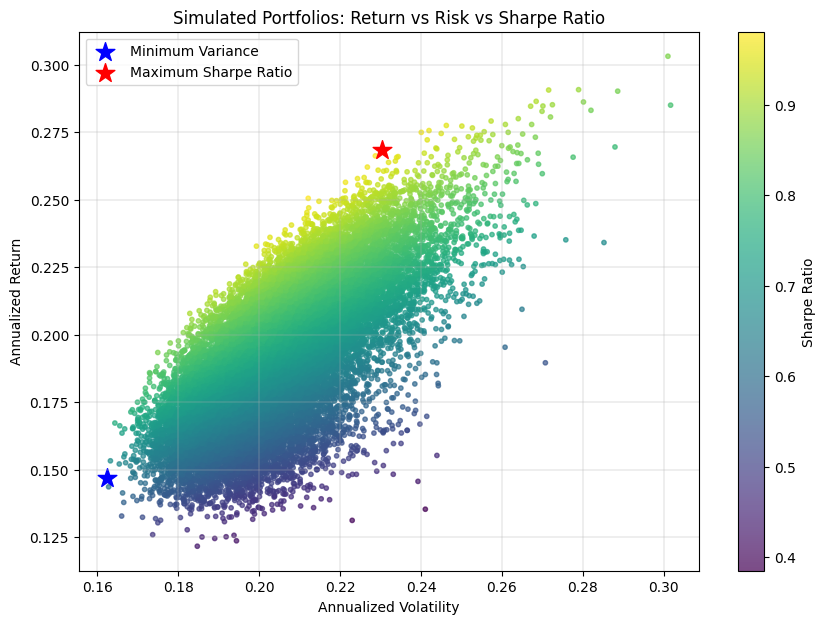

In [72]:
# Gráfica portafolios.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.scatter(min_var_risk, min_var_rent, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk, max_sr_rent, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Simulated Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [73]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr = pd.DataFrame(weights.iloc[min_var_index], index=stocks)
pond_min_vr.columns = ["Allocation"]
pond_min_vr.Allocation = [round(i*100, 2) for i in pond_min_vr.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr, 2)}")
print("\n")
print(pond_min_vr.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr = pd.DataFrame(weights.iloc[max_sr_index], index=stocks)
pond_max_sr.columns = ["Allocation"]
pond_max_sr.Allocation = [round(i*100, 2) for i in pond_max_sr.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr, 2)}")
print("\n")
print(pond_max_sr.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 14.7
Annualized Risk: 16.24
Sharpe Ratio: 0.64


             HPQ  INTC    JNJ  JPM     KO    PFE     PG  PYPL  TSLA   XOM
Allocation  0.09  5.27  23.82  5.6  15.31  18.26  24.47  2.59  1.93  2.66
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 26.86
Annualized Risk: 23.05
Sharpe Ratio: 0.98


             HPQ  INTC   JNJ   JPM    KO    PFE    PG  PYPL   TSLA    XOM
Allocation  0.22  0.73  5.82  2.94  1.65  19.36  24.6  2.56  28.93  13.18
--------------------------------------------------------------------------------


In [74]:
# Minimización de Varianza.
def min_variance_f(varcov):
    number_assets = varcov.shape[0]
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Máximización de Sharpe Ratio.
def max_sharpe_ratio_f(mean_returns, varcov, risk_free):
    
    def auxiliar1(weights, mean_returns, varcov, risk_free):
        a = rent_Portfolios_f(weights=weights, mean_returns=mean_returns)
        b = risk_Portfolios_f(weights=weights, varcov=varcov)
        c = -((a - risk_free)/b)

        return c
    
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (mean_returns, varcov, risk_free)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(auxiliar1, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Calculo Frontera eficiente.
def efficient_frontier_f(mean_returns, varcov, target):
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: rent_Portfolios_f(x, mean_returns) - target},
                   {"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x    


In [75]:
# Portafolio de Mínima Varianza (Optimización).
weights_min_var_clc = min_variance_f(cov_matrix)
min_var_rent_clc = rent_Portfolios_f(weights_min_var_clc, mean_returns)
min_var_risk_clc = risk_Portfolios_f(weights_min_var_clc, cov_matrix)
min_var_sr_clc = sharpe_ratio_f(min_var_rent_clc, risk_free, min_var_risk_clc)

# Portafolio de Máxima Eficiencia (Optimización).
weights_max_sr_clc = max_sharpe_ratio_f(mean_returns, cov_matrix, risk_free)
max_sr_rent_clc = rent_Portfolios_f(weights_max_sr_clc, mean_returns)
max_sr_risk_clc = risk_Portfolios_f(weights_max_sr_clc, cov_matrix)
max_sr_sr_clc = sharpe_ratio_f(max_sr_rent_clc, risk_free, max_sr_risk_clc)

# Frontera eficiente.
rent_targets = np.linspace(min_var_rent_clc, np.max(results_portfolios["Rtrn"]), 100)

frontier_rent_clc = []
frontier_risk_clc = []
for i in rent_targets:
    weights_clc = efficient_frontier_f(mean_returns, cov_matrix, i)
    frontier_rent_clc.append(rent_Portfolios_f(weights_clc, mean_returns))
    frontier_risk_clc.append(risk_Portfolios_f(weights_clc, cov_matrix))

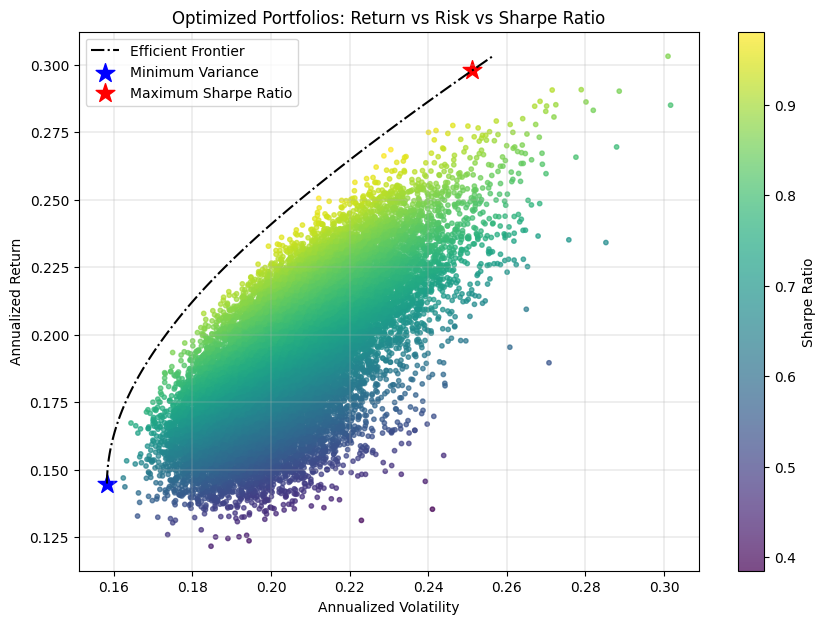

In [76]:
# Gráfica portafolios y frontera eficiente.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.plot(frontier_risk_clc, frontier_rent_clc, linestyle = "-.", color = "black", label = "Efficient Frontier")

plt.scatter(min_var_risk_clc, min_var_rent_clc, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk_clc, max_sr_rent_clc, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Optimized Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [79]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr_clc = pd.DataFrame(weights_min_var_clc, index=stocks)
pond_min_vr_clc.columns = ["Allocation"]
pond_min_vr_clc.Allocation = [round(i*100, 2) for i in pond_min_vr_clc.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr_clc, 2)}")
print("\n")
print(pond_min_vr_clc.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr_clc = pd.DataFrame(weights_max_sr_clc, index=stocks)
pond_max_sr_clc.columns = ["Allocation"]
pond_max_sr_clc.Allocation = [round(i*100, 2) for i in pond_max_sr_clc.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr_clc, 2)}")
print("\n")
print(pond_max_sr_clc.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 14.49
Annualized Risk: 15.83
Sharpe Ratio: 0.65


            HPQ  INTC   JNJ  JPM     KO    PFE     PG  PYPL  TSLA   XOM
Allocation  0.0   0.0  30.5  0.0  23.98  11.99  22.85  1.57   1.8  7.31
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 29.8
Annualized Risk: 25.13
Sharpe Ratio: 1.02


              HPQ  INTC   JNJ   JPM   KO    PFE     PG  PYPL   TSLA  XOM
Allocation  10.55   0.0  2.51  4.54  0.0  14.06  35.21   0.0  33.13  0.0
--------------------------------------------------------------------------------


In [78]:
# Juan David Rincón, Mayo 2023.
# Última modificación, Enero 2024.